In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np
import pickle
import seaborn as sns

from scipy.sparse import hstack
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [2]:
stop = stopwords.words('english')

In [3]:
df = pd.read_json("reviews_Baby_5.json", lines=True)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,1373932800,"07 16, 2013"
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5,Should be required for all new parents!,1372464000,"06 29, 2013"
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5,Grandmother watching baby,1395187200,"03 19, 2014"
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5,repeat buyer,1376697600,"08 17, 2013"
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4,Great,1396310400,"04 1, 2014"
...,...,...,...,...,...,...,...,...,...
160787,A30J0DKNKCF7SR,B00L13XFIE,SD,"[0, 0]",Bought this as a baby gift and my friend heard...,5,Great baby gift,1391126400,"01 31, 2014"
160788,AG4E44KM93P4L,B00L13XFIE,Silofish,"[0, 1]",I am new to cloth diapering. I was leery that ...,4,Not too bulky,1343606400,"07 30, 2012"
160789,A2UZUH4QHV4HA1,B00L13XFIE,"S. Smith ""sunnshyne309""","[0, 0]",My friend is planning on cloth diapering and I...,5,great help!,1364256000,"03 26, 2013"
160790,A2Z26PUQPMT5JV,B00L13XFIE,Stephanie S. Kim,"[0, 0]",We LOVE the organic cotton/hemp inserts. They'...,5,Love these diapers!,1391731200,"02 7, 2014"


In [4]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160792 entries, 0 to 160791
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      160792 non-null  object
 1   asin            160792 non-null  object
 2   reviewerName    159427 non-null  object
 3   helpful         160792 non-null  object
 4   reviewText      160792 non-null  object
 5   overall         160792 non-null  int64 
 6   summary         160792 non-null  object
 7   unixReviewTime  160792 non-null  int64 
 8   reviewTime      160792 non-null  object
dtypes: int64(2), object(7)
memory usage: 11.0+ MB


In [6]:
countvalues= df["overall"].value_counts()

In [7]:
countvalues

overall
5    93526
4    32999
3    17255
2     9193
1     7819
Name: count, dtype: int64

<BarContainer object of 5 artists>

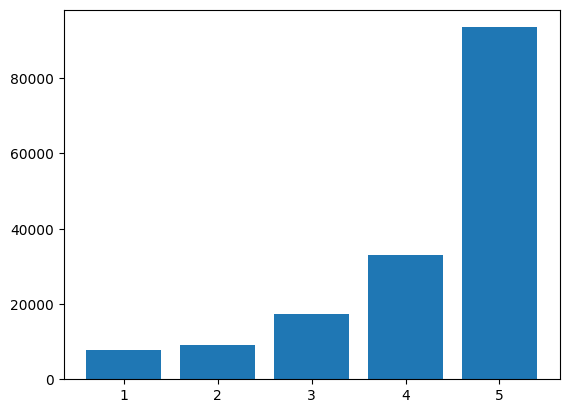

In [8]:
plt.bar([5,4,3,2,1],countvalues)

In [9]:
sampledf=df.sample(10000)

In [10]:
samp_count=sampledf["overall"].value_counts()

<BarContainer object of 5 artists>

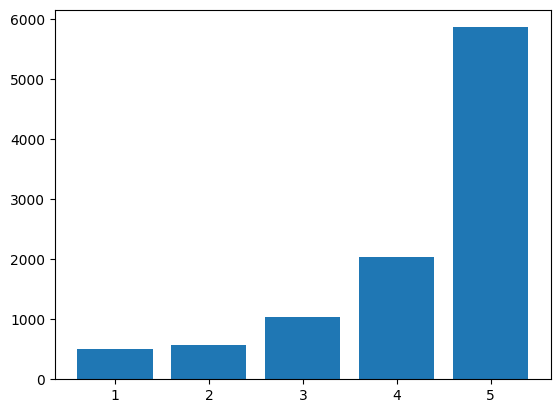

In [11]:
plt.bar([5,4,3,2,1],samp_count)

In [12]:
def classify_rating(x :[int])->[int]: 
    if x<3:
        return -1
    if x==3:
        return 0
    if x>3:
        return 1

In [13]:
df["labels"]= df["overall"].apply(classify_rating)


In [14]:
countlabel=df["labels"].value_counts()

In [15]:
countlabel

labels
 1    126525
 0     17255
-1     17012
Name: count, dtype: int64

<BarContainer object of 3 artists>

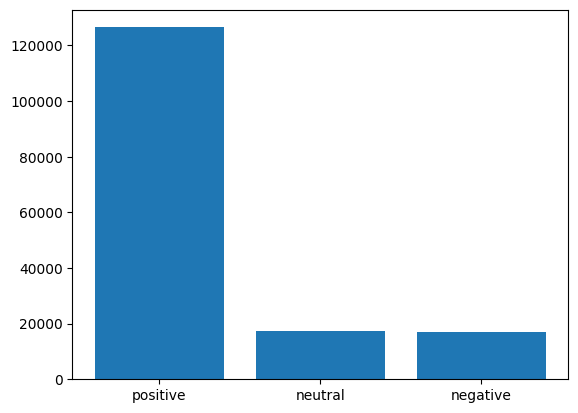

In [16]:
plt.bar(["positive","neutral","negative"],countlabel)

In [17]:
# Assuming df is your dataframe and 'labels' is the target column
label_counts = df['labels'].value_counts()

# Determine the smallest class count (which is the limiting factor)
min_count = label_counts.min()

# Take a sample of the minimum size from each class
df_undersampled = df.groupby('labels').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

# Now df_undersampled has balanced class distributions

In [18]:
df_undersampled

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,labels
0,A3B1DT3EWXFFPE,B001CUPT3K,"Amazon Customer ""SNS""","[2, 3]",I purchased this because my old worn down but ...,1,Worst weather shield!,1359763200,"02 2, 2013",-1
1,A2V55F355DDVCG,B00081L2Q2,"J. Apfel ""Maxito's dad""","[0, 0]",We bought this instead of the pull back shades...,2,Not worth aiming for the cheap side,1337126400,"05 16, 2012",-1
2,AGJM0LB7EDRJG,B002UXQRDO,S. Reid,"[0, 0]",Do you like soaking wet bras? Do you enjoy loo...,1,Awful! Don't waste your money!,1293235200,"12 25, 2010",-1
3,A1SUZJ1XP2QQXA,B006STJUBC,laura123456789,"[0, 0]",My 1 year old daughter just does not like this...,2,Smells like moth balls,1391990400,"02 10, 2014",-1
4,A1VQ3C009A55YE,B004HFQOLS,pamazon,"[1, 1]",The phlanges are 24mm......I ended up being a ...,1,Don't waste your $$,1382486400,"10 23, 2013",-1
...,...,...,...,...,...,...,...,...,...,...
51031,A36GBYG56FMW55,B000I2Q0FO,Bee's Mom,"[0, 0]",I picked up my daughter from daycare a week ag...,4,8 month old will not let it go.,1331769600,"03 15, 2012",1
51032,AE62182ZKLN85,B000I2OKDS,Pfeifer Mommy,"[0, 0]","My 3 month old loves this, he loves to stare a...",5,Great buy!,1385251200,"11 24, 2013",1
51033,AR3PEQ375BG9O,B0012AII9M,JenF,"[0, 0]",We have several of these for our kids and boug...,5,Best blankets of all time!,1386979200,"12 14, 2013",1
51034,A2VSEA1M7OGQFI,B002SG7JSU,Amazonmama,"[3, 3]",We have purchased these before. They are grea...,5,Great for coffee tables.,1367193600,"04 29, 2013",1


In [19]:
countlabel=df_undersampled["labels"].value_counts()

<BarContainer object of 3 artists>

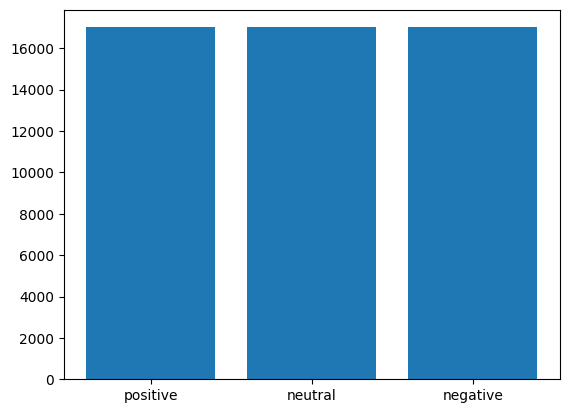

In [20]:
plt.bar(["positive","neutral","negative"],countlabel)

In [21]:
df=df_undersampled

In [22]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,labels
0,A3B1DT3EWXFFPE,B001CUPT3K,"Amazon Customer ""SNS""","[2, 3]",I purchased this because my old worn down but ...,1,Worst weather shield!,1359763200,"02 2, 2013",-1
1,A2V55F355DDVCG,B00081L2Q2,"J. Apfel ""Maxito's dad""","[0, 0]",We bought this instead of the pull back shades...,2,Not worth aiming for the cheap side,1337126400,"05 16, 2012",-1
2,AGJM0LB7EDRJG,B002UXQRDO,S. Reid,"[0, 0]",Do you like soaking wet bras? Do you enjoy loo...,1,Awful! Don't waste your money!,1293235200,"12 25, 2010",-1
3,A1SUZJ1XP2QQXA,B006STJUBC,laura123456789,"[0, 0]",My 1 year old daughter just does not like this...,2,Smells like moth balls,1391990400,"02 10, 2014",-1
4,A1VQ3C009A55YE,B004HFQOLS,pamazon,"[1, 1]",The phlanges are 24mm......I ended up being a ...,1,Don't waste your $$,1382486400,"10 23, 2013",-1
...,...,...,...,...,...,...,...,...,...,...
51031,A36GBYG56FMW55,B000I2Q0FO,Bee's Mom,"[0, 0]",I picked up my daughter from daycare a week ag...,4,8 month old will not let it go.,1331769600,"03 15, 2012",1
51032,AE62182ZKLN85,B000I2OKDS,Pfeifer Mommy,"[0, 0]","My 3 month old loves this, he loves to stare a...",5,Great buy!,1385251200,"11 24, 2013",1
51033,AR3PEQ375BG9O,B0012AII9M,JenF,"[0, 0]",We have several of these for our kids and boug...,5,Best blankets of all time!,1386979200,"12 14, 2013",1
51034,A2VSEA1M7OGQFI,B002SG7JSU,Amazonmama,"[3, 3]",We have purchased these before. They are grea...,5,Great for coffee tables.,1367193600,"04 29, 2013",1


In [23]:
# df=df[["reviewText","overall","summary","labels","helpful"]]
df=df[["reviewText","overall","labels","helpful"]]


In [24]:
# 
df["helpful"].value_counts()

helpful
[0, 0]        28884
[1, 1]         5079
[0, 1]         3143
[1, 2]         2257
[2, 2]         1578
              ...  
[65, 86]          1
[18, 28]          1
[353, 406]        1
[118, 121]        1
[80, 84]          1
Name: count, Length: 879, dtype: int64

In [25]:
# help full score is change to percentage 
df["helpful"] = df["helpful"].apply(lambda x: (min(x) / max(x)) * 100 if max(x) != 0 else 0)


C:\Users\abdul saboor\AppData\Local\Temp\ipykernel_2008\1004786480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["helpful"] = df["helpful"].apply(lambda x: (min(x) / max(x)) * 100 if max(x) != 0 else 0)


In [26]:
df

,reviewText,overall,labels,helpful
0,I purchased this because my old worn down but ...,1,-1,66.666667
1,We bought this instead of the pull back shades...,2,-1,0.000000
2,Do you like soaking wet bras? Do you enjoy loo...,1,-1,0.000000
3,My 1 year old daughter just does not like this...,2,-1,0.000000
4,The phlanges are 24mm......I ended up being a ...,1,-1,100.000000
...,...,...,...,...
51031,I picked up my daughter from daycare a week ag...,4,1,0.000000
51032,"My 3 month old loves this, he loves to stare a...",5,1,0.000000
51033,We have several of these for our kids and boug...,5,1,0.000000
51034,We have purchased these before. They are grea...,5,1,100.000000


In [27]:
# dealing with text data : converting all to lower case :
df["reviewText"]=  df["reviewText"].apply(lambda x : x.lower());
# dealing with text data : converting all to lower case :
# df["summary"]=  df["summary"].apply(lambda x : x.lower());--- test

C:\Users\abdul saboor\AppData\Local\Temp\ipykernel_2008\2159065035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviewText"]=  df["reviewText"].apply(lambda x : x.lower());


In [28]:
df

,reviewText,overall,labels,helpful
0,i purchased this because my old worn down but ...,1,-1,66.666667
1,we bought this instead of the pull back shades...,2,-1,0.000000
2,do you like soaking wet bras? do you enjoy loo...,1,-1,0.000000
3,my 1 year old daughter just does not like this...,2,-1,0.000000
4,the phlanges are 24mm......i ended up being a ...,1,-1,100.000000
...,...,...,...,...
51031,i picked up my daughter from daycare a week ag...,4,1,0.000000
51032,"my 3 month old loves this, he loves to stare a...",5,1,0.000000
51033,we have several of these for our kids and boug...,5,1,0.000000
51034,we have purchased these before. they are grea...,5,1,100.000000


In [29]:
# Replace punctuation with space in reviewText
df["reviewText"] = df["reviewText"].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

# Replace punctuation with space in summary
# df["summary"] = df["summary"].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

C:\Users\abdul saboor\AppData\Local\Temp\ipykernel_2008\846383071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviewText"] = df["reviewText"].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))


In [30]:
df

,reviewText,overall,labels,helpful
0,i purchased this because my old worn down but ...,1,-1,66.666667
1,we bought this instead of the pull back shades...,2,-1,0.000000
2,do you like soaking wet bras do you enjoy loo...,1,-1,0.000000
3,my 1 year old daughter just does not like this...,2,-1,0.000000
4,the phlanges are 24mm i ended up being a ...,1,-1,100.000000
...,...,...,...,...
51031,i picked up my daughter from daycare a week ag...,4,1,0.000000
51032,my 3 month old loves this he loves to stare a...,5,1,0.000000
51033,we have several of these for our kids and boug...,5,1,0.000000
51034,we have purchased these before they are grea...,5,1,100.000000


In [31]:
# df["summary"].value_counts()

In [32]:
# removing stop words from the text data :
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
# df['summary'] = df['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

C:\Users\abdul saboor\AppData\Local\Temp\ipykernel_2008\974994975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


In [33]:
df

,reviewText,overall,labels,helpful
0,purchased old worn reliable shield witts end s...,1,-1,66.666667
1,bought instead pull back shades thinking work ...,2,-1,0.000000
2,like soaking wet bras enjoy looking like come ...,1,-1,0.000000
3,1 year old daughter like toy tried everything ...,2,-1,0.000000
4,phlanges 24mm ended 36mm change phlanges like ...,1,-1,100.000000
...,...,...,...,...
51031,picked daughter daycare week ago usually elate...,4,1,0.000000
51032,3 month old loves loves stare chuckles constan...,5,1,0.000000
51033,several kids bought gift work great swaddling ...,5,1,0.000000
51034,purchased great end tables coffee tables end t...,5,1,100.000000


In [34]:
# applying lematizer on words 
lemmatizer = WordNetLemmatizer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
# df['summary'] = df['summary'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

C:\Users\abdul saboor\AppData\Local\Temp\ipykernel_2008\2176010896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [35]:
# Create separate vectorizers for reviewText and summary
vectorizer_review = CountVectorizer()
# vectorizer_summary = CountVectorizer()

# Vectorize each separately
X_cvec_review = vectorizer_review.fit_transform(df['reviewText'])
# X_cvec_summary = vectorizer_summary.fit_transform(df['summary'])


In [36]:
print(X_cvec_review.shape)
# print(X_cvec_summary.shape)

(51036, 34373)


In [37]:
# Create separate TF-IDF vectorizers
tfidf_review = TfidfVectorizer(max_features=5000)  # For reviewText
# tfidf_summary = TfidfVectorizer(max_features=5000)  # For summary

X_tfidf_review = tfidf_review.fit_transform(df['reviewText'])
# X_tfidf_summary = tfidf_summary.fit_transform(df['summary'])

In [38]:
print("Shape of TF-IDF matrix for reviewText:", X_tfidf_review.shape)
# print("Shape of TF-IDF matrix for summary:", X_tfidf_summary.shape)


Shape of TF-IDF matrix for reviewText: (51036, 5000)


In [39]:
df

,reviewText,overall,labels,helpful
0,purchased old worn reliable shield witts end s...,1,-1,66.666667
1,bought instead pull back shade thinking work w...,2,-1,0.000000
2,like soaking wet bra enjoy looking like come w...,1,-1,0.000000
3,1 year old daughter like toy tried everything ...,2,-1,0.000000
4,phlanges 24mm ended 36mm change phlanges like ...,1,-1,100.000000
...,...,...,...,...
51031,picked daughter daycare week ago usually elate...,4,1,0.000000
51032,3 month old love love stare chuckle constantly...,5,1,0.000000
51033,several kid bought gift work great swaddling b...,5,1,0.000000
51034,purchased great end table coffee table end tab...,5,1,100.000000


In [40]:
# input : of model
x=df[["overall","helpful"]].values
x



array([[  1.        ,  66.66666667],
       [  2.        ,   0.        ],
       [  1.        ,   0.        ],
       ...,
       [  5.        ,   0.        ],
       [  5.        , 100.        ],
       [  4.        ,  20.        ]])

In [41]:
# output : of model
y= df["labels"].values
y

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

In [42]:
# split train and test data :
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=43)
print("Shapes of x_Train and y_Train:")
print(x_train.shape)
print(y_train.shape)
print("Shapes of x_Test and y_Test:")
print(x_test.shape)
print(y_test.shape)


Shapes of x_Train and y_Train:
(40828, 2)
(40828,)
Shapes of x_Test and y_Test:
(10208, 2)
(10208,)


In [43]:
# split train and test data : of count vectors :
x_cvec_review_train,x_cvec_review_test,*_= train_test_split(X_cvec_review,y,test_size=0.2,random_state=43)
# x_cvec_summary_train,x_cvec_summary_test,*_= train_test_split(X_cvec_summary,y,test_size=0.2,random_state=43)
print("Shapes of Count Vectors Review:")
print(x_cvec_review_train.shape)
print(x_cvec_review_test.shape)

# print("Shapes of Count Vectors Summary:")
# print(x_cvec_summary_train.shape)
# print(x_cvec_summary_test.shape)

Shapes of Count Vectors Review:
(40828, 34373)
(10208, 34373)


In [44]:
# split train and test data : of tfidfs vectors :
x_tfidf_review_train,x_tfidf_review_test,*_= train_test_split(X_tfidf_review,y,test_size=0.2,random_state=43)
# x_tfidf_summary_train,x_tfidf_summary_test,*_= train_test_split(X_tfidf_summary,y,test_size=0.2,random_state=43)
# Print shapes to verify splits
print("Shapes of TF-IDF Review:")
print(x_tfidf_review_train.shape)
print(x_tfidf_review_test.shape)

# print("Shapes of TF-IDF Summary:")
# print(x_tfidf_summary_train.shape)
# print(x_tfidf_summary_test.shape)



Shapes of TF-IDF Review:
(40828, 5000)
(10208, 5000)


In [45]:
model = LogisticRegression(penalty='l2', C=0.1)


In [46]:
# Combine all features into a single input
# x_train_combined = hstack([x_train, x_tfidf_review_train, x_tfidf_summary_train,x_cvec_review_train,x_cvec_summary_train])
# x_test_combined = hstack([x_test, x_tfidf_review_test, x_tfidf_summary_test,x_cvec_review_test,x_cvec_summary_test])
x_train_combined = hstack([x_train, x_tfidf_review_train, x_cvec_review_train])
x_test_combined = hstack([x_test, x_tfidf_review_test, x_cvec_review_test])


In [47]:
model.fit(x_train_combined,y_train)

C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [48]:
y_pred=model.predict(x_test_combined)

In [49]:

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9375979623824452
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      3400
           0       0.92      0.89      0.91      3436
           1       0.94      0.96      0.95      3372

    accuracy                           0.94     10208
   macro avg       0.94      0.94      0.94     10208
weighted avg       0.94      0.94      0.94     10208



In [50]:

# Use cross-validation to evaluate the model
# cv_scores = cross_val_score(model, x_train_combined, y_train, cv=5)  # 5-fold cross-validation
# print("Cross-validation scores:", cv_scores)
# print("Mean cross-validation score:", cv_scores.mean())


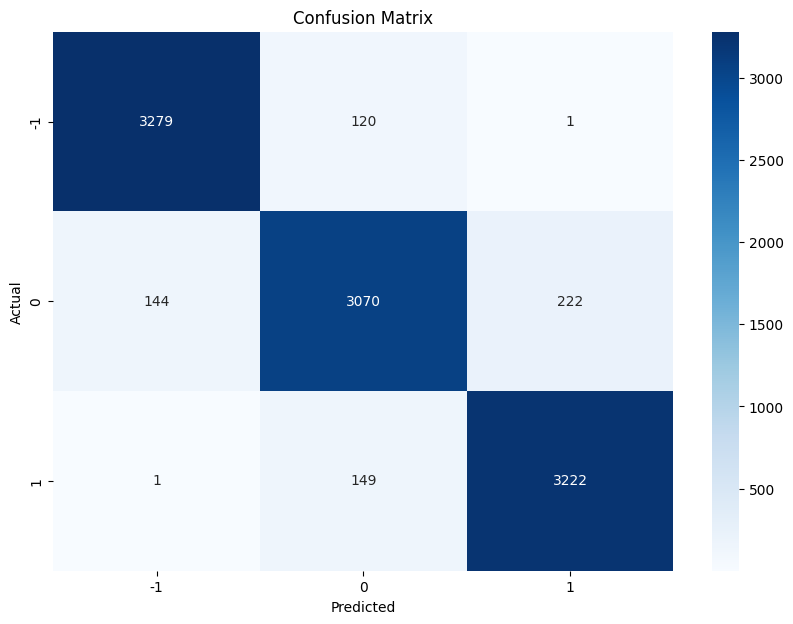

In [51]:


y_pred = model.predict(x_test_combined)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [57]:
import pickle


# Save the model
with open('picklefiles/logisticregression.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizers
with open('picklefiles/vectorizer_review.pkl', 'wb') as review_vec_file:
    pickle.dump(vectorizer_review, review_vec_file)

# with open('vectorizer_summary.pkl', 'wb') as summary_vec_file:
#     pickle.dump(vectorizer_summary, summary_vec_file)

# Save the TF-IDF vectorizers (if you used them)
with open('picklefiles/tfidf_review.pkl', 'wb') as tfidf_review_file:
    pickle.dump(tfidf_review, tfidf_review_file)

# with open('tfidf_summary.pkl', 'wb') as tfidf_summary_file:
#     pickle.dump(tfidf_summary, tfidf_summary_file)



In [58]:
# Load the model
with open('picklefiles/logisticregression.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the vectorizers
with open('picklefiles/vectorizer_review.pkl', 'rb') as review_vec_file:
    vectorizer_review = pickle.load(review_vec_file)

# with open('vectorizer_summary.pkl', 'rb') as summary_vec_file:
#     vectorizer_summary = pickle.load(summary_vec_file)

# Load the TF-IDF vectorizers (if you used them)
with open('picklefiles/tfidf_review.pkl', 'rb') as tfidf_review_file:
    tfidf_review = pickle.load(tfidf_review_file)

# with open('tfidf_summary.pkl', 'rb') as tfidf_summary_file:
#     tfidf_summary = pickle.load(tfidf_summary_file)

# Load other transformers as needed


In [ ]:
# model.predict()

In [59]:
# function to convert to lower case :
def lowercase(str:[str])->[str]:
    return str.lower()
#  function to remove punctuations :
def removepunctuations(s: str) -> str:
    # Create translation table to replace punctuation with spaces
    translation_table = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    # Remove punctuation using the translation table
    return s.translate(translation_table)
#  function to remove punctuations :
def removestopwords(s: str, stop: set=stop) -> str:
    return ' '.join([word for word in s.split() if word not in stop])
# apply lemmatizer
def applylemmatizer(s:str)->[str]:
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(s) for s in s.split()])
# apply counter vector
def applycountvector(s: str, vectorizer: CountVectorizer) -> any:
    return vectorizer.transform([s])
# apply tfidf vector
def applyTFIDFvector(s: str, vectorizer: TfidfVectorizer) -> any:
    return vectorizer.transform([s])

# combined all  the parameters :
# def combineparameters (x_tfidf_review,x_cvec_review,x_tfidf_summary,x_cvec_summary):
#     return hstack([x_tfidf_review,x_cvec_review,x_tfidf_summary,x_cvec_summary])
def combineparameters (x_tfidf_review,x_cvec_review,):
    return hstack([x_tfidf_review,x_cvec_review])


def applydatapreprocessing(s:str,cvector:CountVectorizer,tfidf:TfidfVectorizer)->any:
    s=lowercase(s)
    s=removepunctuations(s)
    s=removestopwords(s)
    s=applylemmatizer(s)
    s_vec=applycountvector(s,cvector)
    s_tfidf=applyTFIDFvector(s,tfidf)
    return hstack([s_tfidf,s_vec])
      

In [61]:
overall = 3
helpful=100.0
reviewtxt="cant use it at all"
# summarytxt="ok"




  (0, 4715)	0.33540457200358204
  (0, 704)	0.9420741866111679
  (0, 10855)	1.0
  (0, 37428)	1.0


In [ ]:
str=applylemmatizer(removestopwords(reviewtxt,stop))
print(applycountvector(str,vectorizer_review))
print(applyTFIDFvector(str,tfidf_review))

In [ ]:

preprocessreview=applydatapreprocessing(reviewtxt,vectorizer_review,tfidf_review)
# preprocesssummary=applydatapreprocessing(summarytxt,vectorizer_summary,tfidf_summary)


In [ ]:
# input=hstack([overall,helpful,preprocessreview,preprocesssummary])
input=hstack([overall,helpful,preprocessreview])

In [ ]:
input

In [ ]:
model.predict(input)

In [ ]:
# Get coefficients
coefficients = model.coef_[0]  # For binary classification

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Coefficient': coefficients})
coef_df['Importance'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Importance', ascending=False)



In [ ]:
len(coef_df[coef_df["Importance"]==0.0])

In [ ]:
len(coef_df[coef_df["Coefficient"]==0.0])